#  ONE:
# Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [43]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [44]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   ------- ------------------------------- 30.7/151.4 kB 325.1 kB/s eta 0:00:01
   ------- ------------------------------- 30.7/151.4 kB 325.1 kB/s eta 0:00:01
   --------------------- ----------------- 81.9/151.4 kB 459.5 kB/s eta 0:00:01
   ----------------------------------- -- 143.4/151.4 kB 708.1 kB/s eta 0:00:01
   ----------------------------------- -- 143.4/151.4 kB 708.1 kB/s eta 0:00:01
   -------------------------------------- 151.4/151.4 kB 530.8 kB/s eta 0:00:00


In [47]:
!pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     - -------------------------------------- 30.7/636.8 kB ? eta -:--:--
     -- ---------------------------------- 41.0/636.8 kB 393.8 kB/s eta 0:00:02
     ---- -------------------------------- 81.9/636.8 kB 573.4 kB/s eta 0:00:01
     --------- -------------------------- 163.8/636.8 kB 984.6 kB/s eta 0:00:01
     ----------- ------------------------ 204.8/636.8 kB 958.4 kB/s eta 0:00:01
     -------------------- ----------------- 337.9/636.8 kB 1.2 MB/s eta 0:00:01
     --------------------- ---------------- 358.4/636.8 kB 1.3 MB/s eta 0:00:01
     ----------------------- -------------- 389.1/636.8 kB 1.1 MB/s eta 0:00:01
     -------------------------- ----------- 440.3/636.8 kB 1.1 MB/s eta 0:00:01
     ---------------------------- --------- 471.0/636.8 kB 1.1 MB/s

In [4]:
# Import Dataset
tweets = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/Text Mining/Elon_musk.csv', encoding='cp1252')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
tweets.drop(['Unnamed: 0'],inplace= True, axis= 1)
tweets

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


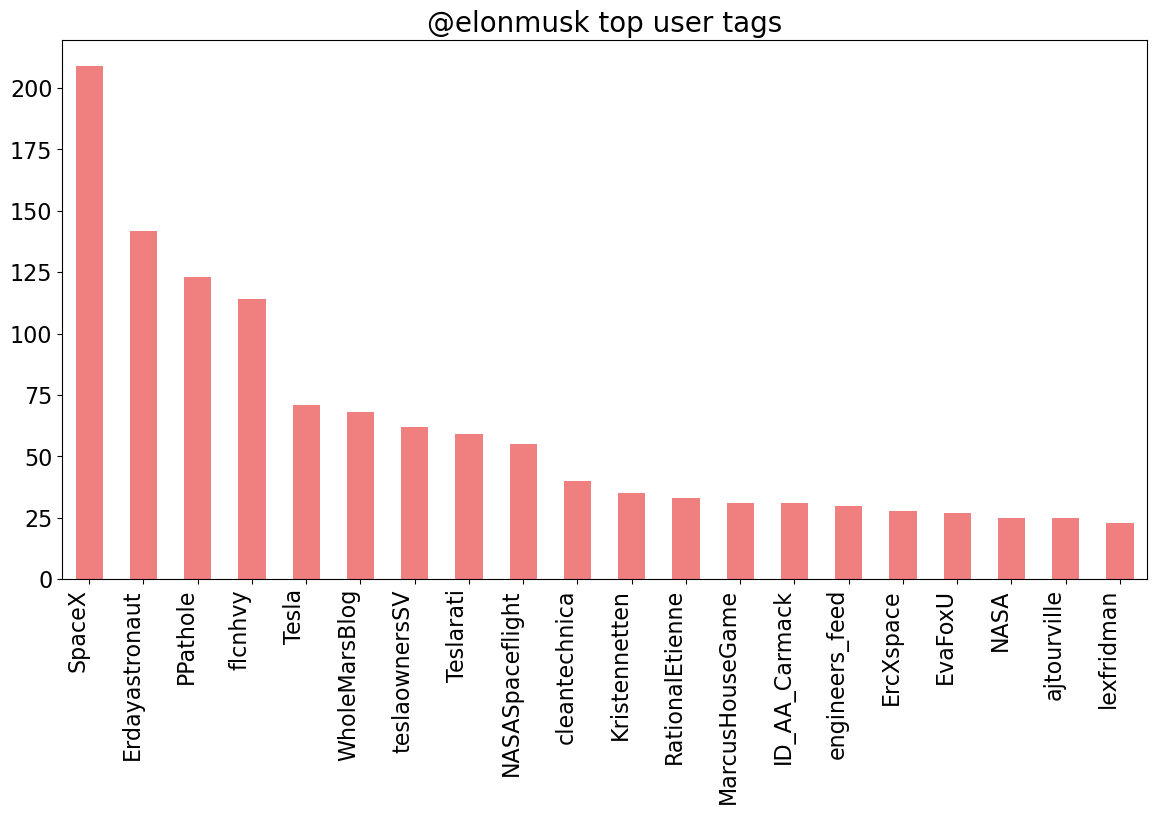

In [6]:
# Data Exploration
import itertools

t = list(itertools.chain(*tweets.Text.map(lambda t: [handle.replace(":","")[1:] for handle in t.split(" ")
                                                    if '@' in handle.replace(":","")]).tolist()))
pd.Series(t).value_counts().head(20).plot.bar(figsize=(14,7), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

# Basic Text Preprocessing

In [7]:
# Cleaning the text by removing irrelevant information
import re #regular expression
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

tweets["Text"] = tweets["Text"].apply(clean_text)
tweets.head(11)

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
5,happy new year of the ox
6,frodo was the underdoge\nall thought he would ...
7,owensparks flcnhvy haha thanks
8,flcnhvy indeed tweets definitely do not repre...
9,the most entertaining outcome is the most likely


In [8]:
# Word Frequency
freq = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq

the               487
to                400
a                 356
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                136
on                129
that              128
rt                127
but               126
Name: count, dtype: int64

In [11]:
# Removing Stopwords, First download nltk:
# import nltk
# nltk.download()
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [23]:
# Word Frequency after removal of stopwords
freq_stp = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] 
freq_stp

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
good                51
launch              49
sure                43
yeah                41
cleantechnica       40
would               40
Name: count, dtype: int64

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(tweets["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.vocabulary_.items(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(11)

,term,occurrences,frequency
0,"(im, 1912)",1,0.000076
1,"(alien, 112)",6,0.000453
2,"(idaacarmack, 1895)",1,0.000076
3,"(ray, 3125)",1,0.000076
4,"(tracing, 4048)",3,0.000227
5,"(cyberpunk, 888)",1,0.000076
6,"(hdr, 1668)",1,0.000076
7,"(nextlevel, 2633)",15,0.001133
8,"(tried, 4071)",1,0.000076
9,"(joerogan, 2086)",1,0.000076


In [27]:
# TF-IDF [Term Frequency, Inverse Document Frequency]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(tweets["Text"])
names_features = vectorizer.vocabulary_.items()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

,im,idaacarmack,cyberpunk,tried,great,interview,doge,teslacn,congratulations,tesla,...,bring,shravantr,color,australia,yourfavgas,ghostteslaphx,maureendowd,bbcsciencenews,businessinsider,teslaratiteam
,381,378,177,895,337,400,214,834,158,832,...,93,738,141,52,996,321,496,70,101,839
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.356742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [29]:
top2_words = get_top_n2_words(tweets["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram","Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,rt spacex,71
1,spacex falcon,17
2,erdayastronaut spacex,16
3,pretty much,12
4,rt nasa,12
5,waemd spacex,11
6,giga berlin,10
7,first stage,10
8,teslaratiteam teslarati,10
9,nasa spacex,9


[Text(0, 0, 'rt spacex'),
 Text(1, 0, 'spacex falcon'),
 Text(2, 0, 'erdayastronaut spacex'),
 Text(3, 0, 'pretty much'),
 Text(4, 0, 'rt nasa'),
 Text(5, 0, 'waemd spacex'),
 Text(6, 0, 'giga berlin'),
 Text(7, 0, 'first stage'),
 Text(8, 0, 'teslaratiteam teslarati'),
 Text(9, 0, 'nasa spacex'),
 Text(10, 0, 'falcon first'),
 Text(11, 0, 'erdayastronaut flcnhvy'),
 Text(12, 0, 'flcnhvy tesla'),
 Text(13, 0, 'coming soon'),
 Text(14, 0, 'spacex dragon'),
 Text(15, 0, 'static fire'),
 Text(16, 0, 'crew dragon'),
 Text(17, 0, 'thesheetztweetz waemd'),
 Text(18, 0, 'astrobehnken astrodoug'),
 Text(19, 0, 'next year')]

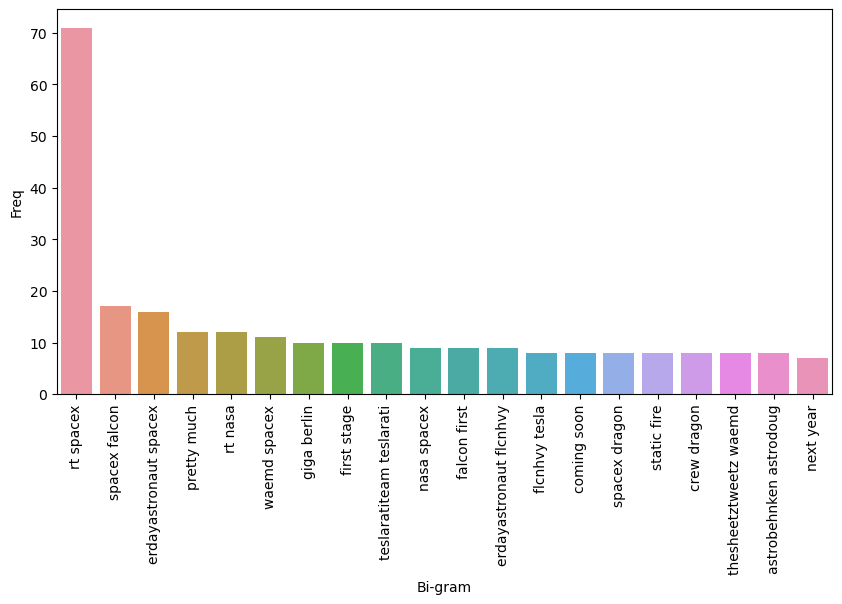

In [30]:
# Bi-gram plot
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"])

In [31]:
# Tri gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [34]:
top3_words = get_top_n3_words(tweets["Text"], n=200) #top 200
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram","Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
5,ppathole thesheetztweetz waemd,7
6,waemd spacex spacexstarlink,7
7,first stage landed,6
8,rt spacex liftoff,6
9,spacex spacexstarlink wanationalguard,6


[Text(0, 0, 'rt spacex falcon'),
 Text(1, 0, 'falcon first stage'),
 Text(2, 0, 'spacex falcon first'),
 Text(3, 0, 'thesheetztweetz waemd spacex'),
 Text(4, 0, 'course still love'),
 Text(5, 0, 'ppathole thesheetztweetz waemd'),
 Text(6, 0, 'waemd spacex spacexstarlink'),
 Text(7, 0, 'first stage landed'),
 Text(8, 0, 'rt spacex liftoff'),
 Text(9, 0, 'spacex spacexstarlink wanationalguard'),
 Text(10, 0, 'spacex felixschlang marcushousegame'),
 Text(11, 0, 'still love droneship'),
 Text(12, 0, 'rt spacex dragon'),
 Text(13, 0, 'first operational mission'),
 Text(14, 0, 'casparstanley ercxspace marcushousegame'),
 Text(15, 0, 'ercxspace marcushousegame felixschlang'),
 Text(16, 0, 'erdayastronaut joshbickett ajtourville'),
 Text(17, 0, 'joshbickett ajtourville spacex'),
 Text(18, 0, 'spacex falcon launches'),
 Text(19, 0, 'tjcooney lrocket spacex')]

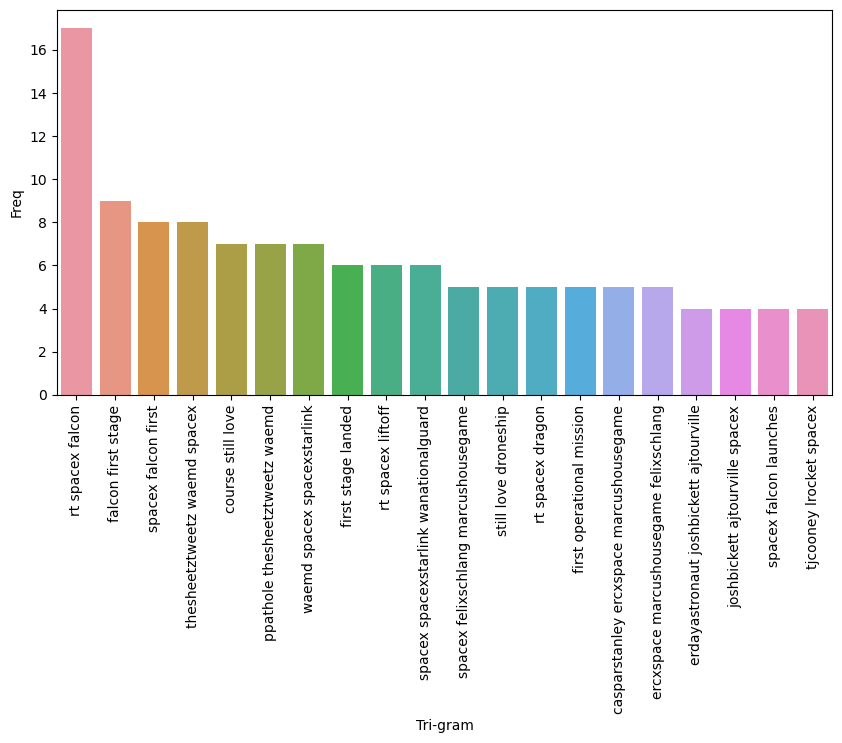

In [35]:
# Tri gram plot
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"])

In [36]:
# Creating a Wordcloud
string_Total = " ".join(tweets["Text"])

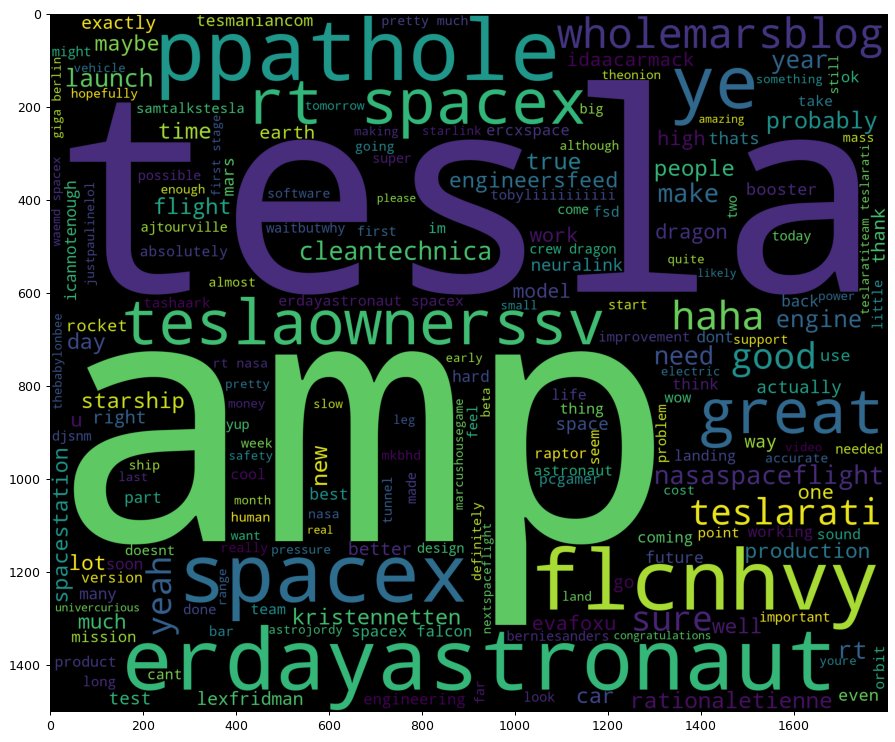

In [45]:
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

In [48]:
# Subjectivity and Polarity
from textblob import TextBlob

# Get the Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity and Polarity
tweets[["subjectivity", "polarity"]] = tweets.apply(sentiment_analysis, axis=1)
tweets.head(11)

,Text,subjectivity,polarity
0,im alien,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
5,happy new year ox,0.727273,0.468182
6,frodo underdoge thought would fail httpstcozgx...,0.300000,-0.500000
7,owensparks flcnhvy haha thanks,0.250000,0.200000
8,flcnhvy indeed tweets definitely represent rea...,0.500000,0.000000
9,entertaining outcome likely,0.850000,0.250000


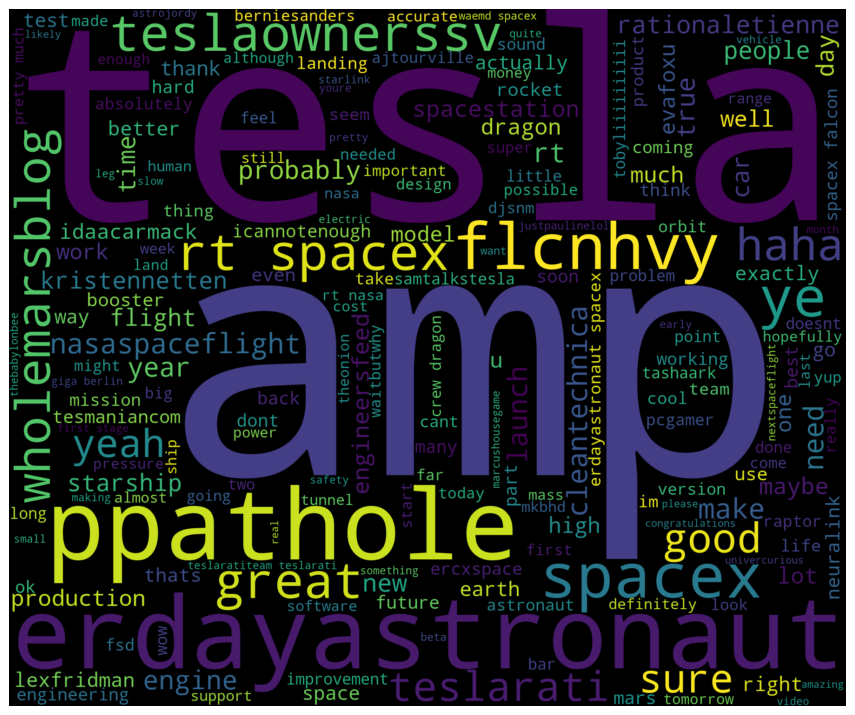

In [49]:
# Creating a workcloud
allwords = " ".join([twts for twts in tweets["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [50]:
# 1st way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2nd way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [51]:
# Compute the negative, neutral, positive analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a new analysis column
tweets["analysis"] = tweets["polarity"].apply(analysis)

In [52]:
positive_tweets = tweets[tweets['analysis'] == 'Positive']
negative_tweets = tweets[tweets['analysis'] == 'Negative']

print('Positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -'+row['Text'])
    
print('Negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Text'])

Positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
Negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year


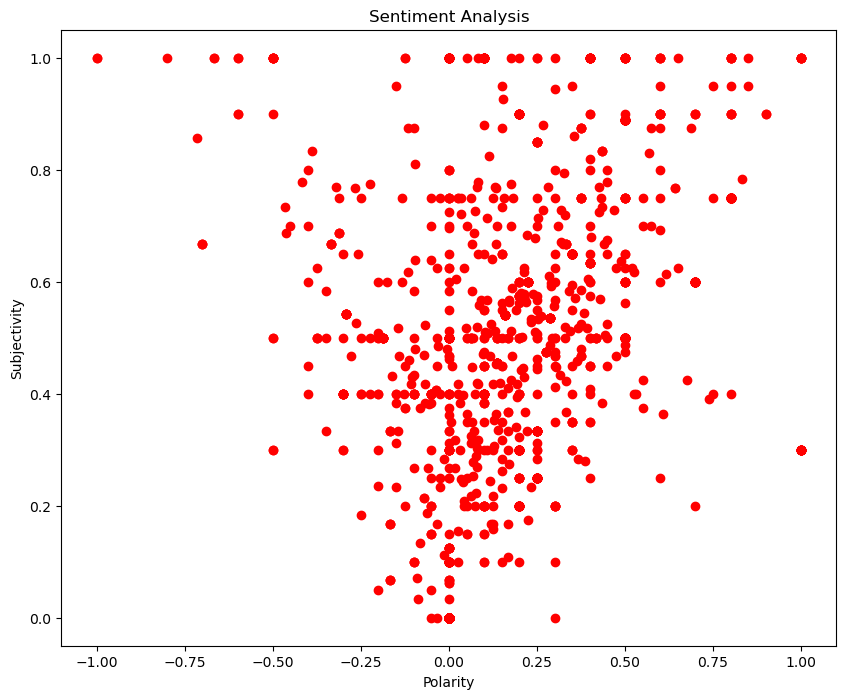

In [53]:
plt.figure(figsize=(10,8))

for i in range(0, tweets.shape[0]):
    plt.scatter(tweets["polarity"][i], tweets["subjectivity"][i], color = "Red")
    
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [54]:
(len(positive_tweets) / len(negative_tweets))*100

422.11055276381904

Conclusion: Since that number is positive, and quite high of a ratio, we can also conclude that Elon Musk is a positive guy.

#  TWO:
# 1) Extract reviews of any product from ecommerce website like amazon
# 2) Perform emotion mining


In [57]:
# Import libraries
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [56]:
!pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/90/f0/0133b684e18932c7bf4075d94819746cee2c0329f2569db526b0fa1df1df/spacy-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd044e6f62a3d317c461f6f0c153c6573ed13025752d779e514000c15dd2/cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.2 from https://files.pythonhosted.org/packages/e4/fc/78cdbdb79f5

In [61]:
# Multi page Web-Scraping
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0'
          }

In [62]:
# Looping through multiple pages
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url':url,'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [63]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [64]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [65]:
# Save results to a DataFrame, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,Reviewed in India on 17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
3,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,Reviewed in India on 16 December 2021
4,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,Reviewed in India on 27 August 2023
...,...,...,...,...
105,4.0 out of 5 stars\nMore than what you pay for,4.0,I have received this product a couple of days ...,Reviewed in India on 7 May 2022
106,"3.0 out of 5 stars\nUseless item, show pcs only",3.0,The media could not be loaded.\n ...,Reviewed in India on 18 October 2023
107,5.0 out of 5 stars\nBestest smartwatch,5.0,I like it because of its display quality and i...,Reviewed in India on 17 November 2023
108,5.0 out of 5 stars\nGood 👍,5.0,Watch is good in look and features and battery...,Reviewed in India on 26 October 2023


In [66]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','',regex=True)
df.head(50)

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
4,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
5,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,15 November 2023
6,4.0 out of 5 stars\nboat watch,4.0,Worst watch . Worst service. Application got h...,20 November 2023
7,4.0 out of 5 stars\nReally very light weight p...,4.0,Only suits on people having big wrist or forea...,22 November 2023
8,4.0 out of 5 stars\nGood smart watch,4.0,Good model lags Bluetooth calling but allows t...,21 November 2023
9,4.0 out of 5 stars\nBOAT WATCH,4.0,I like the entire Product which very stylish p...,23 November 2023


In [67]:
df.to_csv("BoatSmartWatch_Review.csv")

In [70]:
# Load Dataset
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
4,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
...,...,...,...,...
105,4.0 out of 5 stars\nMore than what you pay for,4.0,I have received this product a couple of days ...,7 May 2022
106,"3.0 out of 5 stars\nUseless item, show pcs only",3.0,The media could not be loaded.\n ...,18 October 2023
107,5.0 out of 5 stars\nBestest smartwatch,5.0,I like it because of its display quality and i...,17 November 2023
108,5.0 out of 5 stars\nGood 👍,5.0,Watch is good in look and features and battery...,26 October 2023


In [71]:
# Data Exploration
reviews.Rating.describe()

count    110.000000
mean       3.963636
std        0.540596
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [72]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       108 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [73]:
reviews.isna().sum()

Title          0
Rating         0
Review         2
Review_Date    0
dtype: int64

In [74]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
4,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023


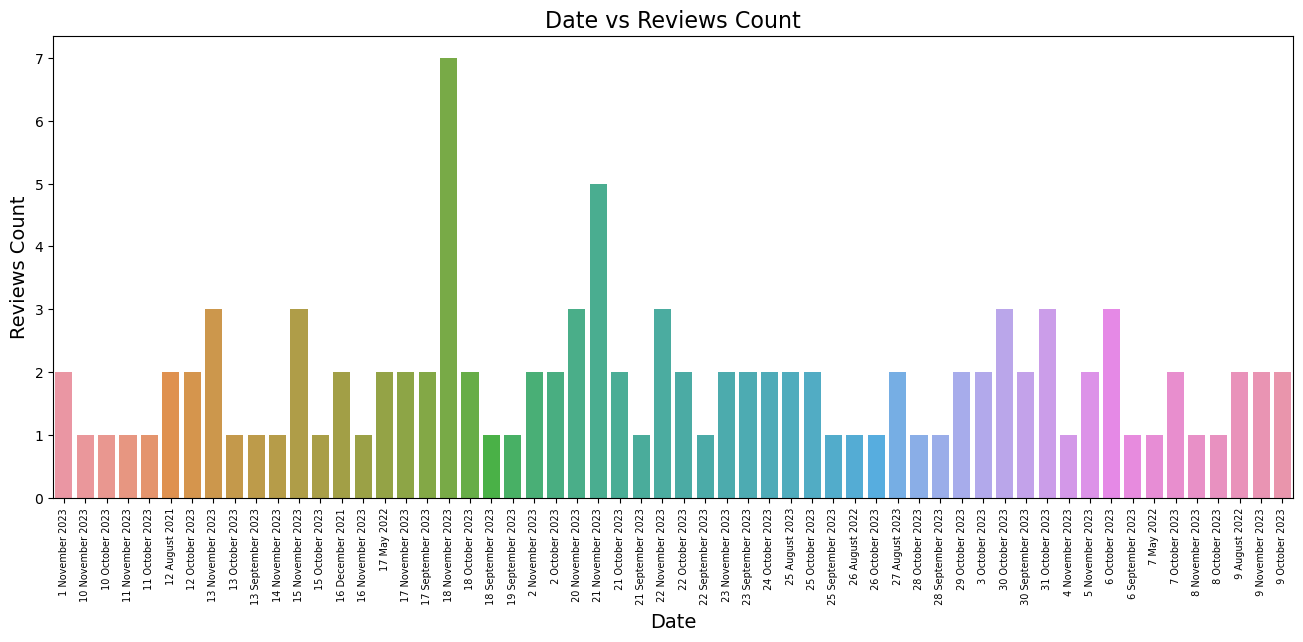

In [75]:
# Date vs Review Count

#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

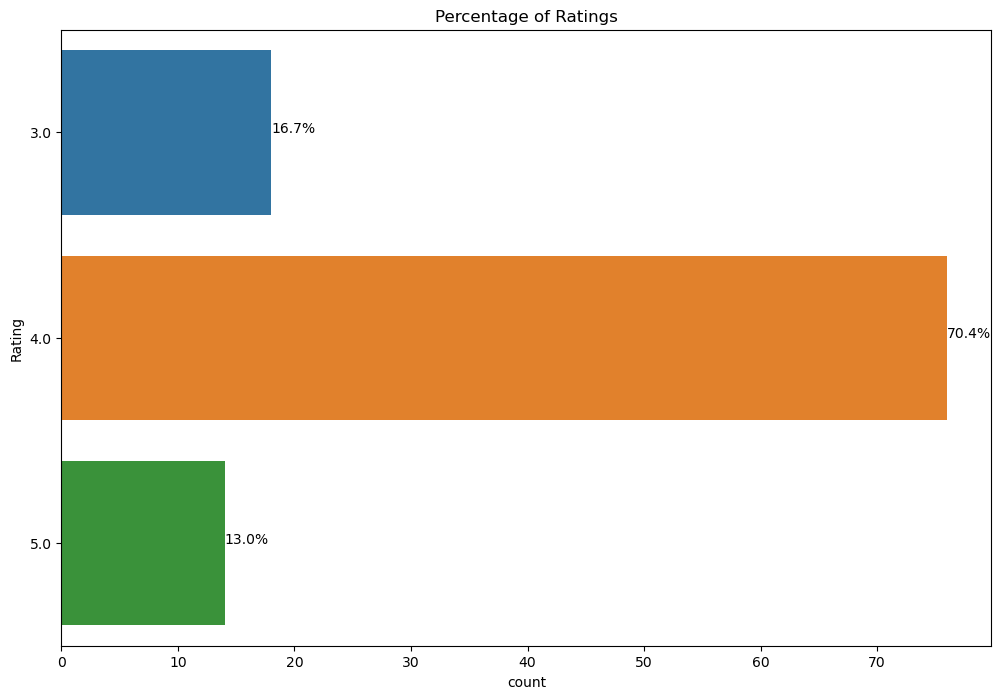

In [76]:
# Percentage of Ratings
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [77]:
# Basic text preprocessing for sentiment analysis
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Review OverviewAverage2.The Coat today launche...
1    The media could not be loaded.\n              ...
2    Shipping the parts mostly covered in other rev...
3    Gros:1. Premium build quality with matter fini...
4    His smart (model Coat extend plus) watch is sa...
Name: Review, dtype: object

In [79]:
boat_review = reviews[['Review']]
boat_review

,Review
0,Review OverviewAverage2.7The Boat today launch...
1,The media could not be loaded.\n ...
2,Skipping the parts mostly covered in other rev...
3,Pros:1. Premium build quality with matte finis...
4,This smart (model Boat extend plus) watch is f...
...,...
105,I have received this product a couple of days ...
106,The media could not be loaded.\n ...
107,I like it because of its display quality and i...
108,Watch is good in look and features and battery...


In [80]:
# Resetting Index
boat_review.reset_index(drop=True, inplace=True)

In [81]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

In [83]:
# Lemmatizer
Lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to Lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [Lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/108 [00:00<?, ?it/s]

In [85]:
# Saving cleaned data to compare with original data, to check amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
4,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...


In [86]:
# Text Pre-processing Techniques

# Removing '@names'
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i,'',text)
        
    return text

In [87]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
4,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,worst watch worst service application got hang...,worst watch . worst service. application got h...
7,suit people big wrist forearm big screen,only suits people big wrist forearms big screen
8,good model lag bluetooth calling allows use al...,good model lags bluetooth calling allows use a...
9,like entire product stylish product,i like entire product stylish product.


In [88]:
# Removing links(http | https)
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
4,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,worst watch worst service application got hang...,worst watch . worst service. application got h...
7,suit people big wrist forearm big screen,only suits people big wrist forearms big screen
8,good model lag bluetooth calling allows use al...,good model lags bluetooth calling allows use a...
9,like entire product stylish product,i like entire product stylish product.


In [89]:
# Removing Review with empty text
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
4,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,worst watch worst service application got hang...,worst watch . worst service. application got h...
7,suit people big wrist forearm big screen,only suits people big wrist forearms big screen
8,good model lag bluetooth calling allows use al...,good model lags bluetooth calling allows use a...
9,like entire product stylish product,i like entire product stylish product.


In [90]:
# Dropping duplicate rows
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
4,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,worst watch worst service application got hang...,worst watch . worst service. application got h...
7,suit people big wrist forearm big screen,only suits people big wrist forearms big screen
8,good model lag bluetooth calling allows use al...,good model lags bluetooth calling allows use a...
9,like entire product stylish product,i like entire product stylish product.


In [91]:
# Function to remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
4,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,worst watch worst service application got hang...,worst watch . worst service. application got h...
7,suit people big wrist forearm big screen,only suits people big wrist forearms big screen
8,good model lag bluetooth calling allows use al...,good model lags bluetooth calling allows use a...
9,like entire product stylish product,i like entire product stylish product.


In [93]:
# Removing Stop words
with codecs.open("C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/Text Mining/stop.txt","r",encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [94]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [95]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
4,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,worst watch worst service application got hang...,worst watch . worst service. application got h...
7,suit people big wrist forearm big screen,only suits people big wrist forearms big screen
8,good model lag bluetooth calling allows use al...,good model lags bluetooth calling allows use a...
9,like entire product stylish product,i like entire product stylish product.


In [96]:
# Tokenize Clean_Reviews
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'used', 'watch', 'month', 'bought', 'first', 'sale', 'keep', 'reading', 'unbiased', 'review', 'tip', 'trick', 'ensure', 'function', 'watch', 'working', 'smoothly', 'large', 'curved', 'display', 'price', 'category', 'inch', 'battery', 'heavy', 'usage', 'frequently', 'waking', 'screen', 'alexa', 'alarm', 'notification', 'day', 'standby', 'checking', 'time', 'occassionally', 'day', 'pretty', 'good', 'full', 'charging', 'time', 'hour', 'decent', 'quality', 'magnetic', 'charging', 'cable', 'provided', 'use', 'low', 'power', 'adapter', 'power', 'bank', 'laptop', 'necessary', 'health', 'workout', 'tracking', 'option', 'spo', 'oxymeter', 'heart', 'rate', 'monitor', 'accuracy', 'sleep', 'tracking', 'pretty', 'accurate', 'paedometer', 'accurate', 'time', 'sometimes', 'hundred', 'step', 'added', 'randomly', 'without', 'activity', 'happens', 'randomly', 'day', 'stress', 'monitor', 'also', 'sure', 'calculated', 'sensor', 'fake', 'probably', 'watch', 'contact',

In [97]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [review, overviewaverage, boat, today, launche...
1    [medium, could, loaded, used, watch, month, bo...
2    [skipping, part, mostly, covered, review, spon...
3    [pro, premium, build, quality, matte, finishin...
4    [smart, model, boat, extend, plus, watch, func...
5    [good, bluetooth, calling, difficult, use, blu...
6    [worst, watch, worst, service, application, go...
7     [suit, people, big, wrist, forearm, big, screen]
8    [good, model, lag, bluetooth, calling, allows,...
9            [like, entire, product, stylish, product]
Name: Clean_Reviews, dtype: object

In [98]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin..."
4,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func..."
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...,"[good, bluetooth, calling, difficult, use, blu..."
6,worst watch worst service application got hang...,worst watch . worst service. application got h...,"[worst, watch, worst, service, application, go..."
7,suit people big wrist forearm big screen,only suits people big wrist forearms big screen,"[suit, people, big, wrist, forearm, big, screen]"
8,good model lag bluetooth calling allows use al...,good model lags bluetooth calling allows use a...,"[good, model, lag, bluetooth, calling, allows,..."
9,like entire product stylish product,i like entire product stylish product.,"[like, entire, product, stylish, product]"


In [99]:
# Converting words to Stemmer
stemmer = SnowballStemmer("english")

xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,review overviewaverag boat today launch boat x...
1,medium could load use watch month bought first...
2,skip part most cover review sponsor yt one add...
3,pro premium build qualiti matt finish sturdi p...
4,smart model boat extend plus watch function we...
...,...
103,receiv product coupl day ago go give honest re...
104,medium could load useless item tri connect cus...
105,like display qualiti featur amaz
106,watch good look featur batteri long last charg...


In [100]:
# Converting words to Lemma
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,review overviewaverage boat today launched boa...
1,medium could loaded used watch month bought fi...
2,skipping part mostly covered review sponsored ...
3,pro premium build quality matte finishing stur...
4,smart model boat extend plus watch functioning...
...,...
103,received product couple day ago going give hon...
104,medium could loaded useless item trying connec...
105,like display quality feature amazing
106,watch good look feature battery long lasted ch...


In [106]:
# Basic Feature Extraction

# Applying bag of words without N grams
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [107]:
print(cv.vocabulary_.items())

dict_items([('review', 931), ('overviewaverage', 759), ('boat', 125), ('today', 1099), ('launched', 590), ('xtend', 1226), ('company', 223), ('latest', 589), ('budget', 143), ('smartwatch', 1002), ('price', 823), ('tag', 1069), ('come', 216), ('stylish', 1041), ('design', 307), ('resembling', 916), ('apple', 73), ('watch', 1180), ('moreover', 685), ('built', 147), ('amazon', 49), ('alexa', 37), ('support', 1053), ('spo', 1018), ('tracking', 1107), ('stress', 1038), ('much', 692), ('coming', 220), ('segment', 960), ('worth', 1222), ('buy', 152), ('query', 856), ('nothing', 719), ('worry', 1220), ('detailed', 311), ('clear', 201), ('doubt', 342), ('contentsbox', 245), ('contentdesign', 244), ('build', 145), ('comfortdisplaywatch', 218), ('ui', 1127), ('featuresalexa', 417), ('supportwatch', 1056), ('facesboat', 399), ('wave', 1183), ('appaccuracybatteryfinal', 70), ('wordsbuy', 1213), ('box', 129), ('contentboat', 243), ('contentsmartwatch', 246), ('black', 121), ('gold', 480), ('colourc

In [108]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [109]:
# CountVectorizer with N-grams(Bigrams and Trigrams)
dataframe = dataframe.reset_index(drop=True)

ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


  0%|          | 0/107 [00:00<?, ?it/s]

In [110]:
corpus[3]

'pro premium build qualiti matt finish sturdi polycarbon frame good soft silicon strap r absolut flush bodi watch attract trendi colour heart rate except heart rate spike weight train pedomet step counter accur spo compar puls oximet read smart watch offer accuraci sleep track accur bed time wake time durat stage sleep inaccur light deep sleep wake detect rem sleep detect sleep data watch synchronis smoothli boat wave app issu warn msg watch worn hand properli detect data surfac larg clear bright sharp lcd ip display even sun touch smooth experienc jitter ui also lag time attach temper glass sometim function requir tap work accept scroll respons finger move diagon instead vertic app gp work superbl excel rout track map featur advertis descript bluetooth connect good mobil kept close proxim boat wave app must remain run background time definit splash proof though nt take risk submerg watch notif work problem call alert sm msg social medium app notif lag though provis sec lag turn alexa 

In [111]:
# Applying CountVectorizer(Creating the Bag of Words model)
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()

In [112]:
x.shape

(107, 1546)

In [115]:
cv.vocabulary_.items()

dict_items([('review', 1136), ('boat', 87), ('today', 1302), ('xtend', 1539), ('compani', 157), ('budget', 104), ('smartwatch', 1181), ('price', 1084), ('come', 151), ('stylish', 1208), ('design', 199), ('appl', 46), ('watch', 1492), ('moreov', 874), ('built', 111), ('amazon', 26), ('alexa', 17), ('support', 1214), ('spo', 1191), ('track', 1326), ('stress', 1204), ('much', 897), ('worth', 1531), ('buy', 114), ('noth', 1009), ('worri', 1529), ('detail', 201), ('clear', 144), ('doubt', 218), ('build', 109), ('ui', 1372), ('supportwatch', 1215), ('facesboat', 253), ('wave', 1508), ('box', 96), ('black', 81), ('gold', 295), ('manual', 693), ('one', 1046), ('alway', 24), ('think', 1231), ('look', 648), ('apart', 36), ('featur', 255), ('major', 674), ('aspect', 49), ('take', 1219), ('care', 130), ('work', 1524), ('time', 1233), ('premium', 1076), ('side', 1164), ('term', 1227), ('inspir', 500), ('cannot', 129), ('compar', 159), ('obvious', 1040), ('everi', 241), ('would', 1534), ('better', 7

In [116]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [117]:
count_df = pd.DataFrame(x, columns=cv.vocabulary_.items())
count_df

,review,boat,today,xtend,compani,budget,smartwatch,price,come,stylish,...,live,impress,upto,flashlight,live score,year,hindi,indian,item,output
,1136,87,1302,1539,157,104,1181,1084,151,1208,...,628,446,1424,282,629,1543,384,472,568,1056
0,0,1,0,4,3,0,0,1,0,0,...,2,0,0,20,7,1,1,0,0,0
1,0,0,1,3,1,1,1,3,0,1,...,0,0,0,1,0,1,1,0,0,0
2,1,1,0,0,1,0,0,6,1,1,...,0,1,0,0,0,0,0,0,0,1
3,3,0,0,3,1,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,0,1,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# TF-IDF Vectorizer
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/107 [00:00<?, ?it/s]

In [120]:
corpus[4]

'smart model boat extend plu watch function well worth price r batteri begin last day next charg last day last settl one day extens user app amol display good touch featur good access app easili reachabl simpl brows featur sleep measur good take day time nap night time show exactli went sleep woke spo measur neaarer measur person digit instrument heart rate measur also nearer instrument stress also reflect nearli real condit activ step show correct distanc also good watch take bike ride walk show distanc cover set target sport featur check yet fulli check featur function water resist ye water resist check bath drizzl rain time display good number display avail cloud suffici alway featur work model avail featur pleas could skin made avail display wrist put rest rais respect featur function featur alway enabl otherwis function bluetooth call featur good speaker loud enough take call use listen audio video walk ofcours batteri drain quickli messag ye good see notif flash light function ok

In [121]:
# Applying TF-IDF Vectorizer
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()
X.shape

(107, 1546)

In [123]:
tfidf_v.vocabulary_.items()

dict_items([('review', 1136), ('boat', 87), ('today', 1302), ('xtend', 1539), ('compani', 157), ('budget', 104), ('smartwatch', 1181), ('price', 1084), ('come', 151), ('stylish', 1208), ('design', 199), ('appl', 46), ('watch', 1492), ('moreov', 874), ('built', 111), ('amazon', 26), ('alexa', 17), ('support', 1214), ('spo', 1191), ('track', 1326), ('stress', 1204), ('much', 897), ('worth', 1531), ('buy', 114), ('noth', 1009), ('worri', 1529), ('detail', 201), ('clear', 144), ('doubt', 218), ('build', 109), ('ui', 1372), ('supportwatch', 1215), ('facesboat', 253), ('wave', 1508), ('box', 96), ('black', 81), ('gold', 295), ('manual', 693), ('one', 1046), ('alway', 24), ('think', 1231), ('look', 648), ('apart', 36), ('featur', 255), ('major', 674), ('aspect', 49), ('take', 1219), ('care', 130), ('work', 1524), ('time', 1233), ('premium', 1076), ('side', 1164), ('term', 1227), ('inspir', 500), ('cannot', 129), ('compar', 159), ('obvious', 1040), ('everi', 241), ('would', 1534), ('better', 7

In [124]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

count_df = pd.DataFrame(X, columns=tfidf_v.vocabulary_.items())
count_df

In [125]:
count_df = pd.DataFrame(X, columns=tfidf_v.vocabulary_.items())
count_df

,review,boat,today,xtend,compani,budget,smartwatch,price,come,stylish,...,live,impress,upto,flashlight,live score,year,hindi,indian,item,output
,1136,87,1302,1539,157,104,1181,1084,151,1208,...,628,446,1424,282,629,1543,384,472,568,1056
0,0.000000,0.014609,0.000000,0.054507,0.037505,0.000000,0.000000,0.013215,0.000000,0.000000,...,0.035845,0.000000,0.000000,0.292187,0.125457,0.015212,0.014609,0.0,0.0,0.000000
1,0.000000,0.000000,0.028706,0.069862,0.021365,0.027215,0.027215,0.067750,0.000000,0.024074,...,0.000000,0.000000,0.000000,0.024967,0.000000,0.025997,0.024967,0.0,0.0,0.000000
2,0.028251,0.027131,0.000000,0.000000,0.023217,0.000000,0.000000,0.147248,0.029575,0.026162,...,0.000000,0.024541,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.031195
3,0.090040,0.000000,0.000000,0.080656,0.024666,0.031420,0.031420,0.000000,0.000000,0.027794,...,0.000000,0.026072,0.033141,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.040765,0.000000,0.000000,0.000000,0.000000,0.000000,0.036873,0.044436,0.000000,...,0.000000,0.036873,0.000000,0.000000,0.000000,0.000000,0.081530,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.051147,0.000000,0.056477,0.137448,0.000000,0.000000,0.000000,0.000000,0.000000,0.047364,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [126]:
# Named Entity Recognition(NER)
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'review overviewaverage boat today launched boat xtend company latest budget smartwatch price tag r boat xtend smartwatch come stylish design resembling apple watch moreover built amazon alexa support spo tracking stress tracking much coming budget segment worth buy smartwatch query nothing worry detailed review boat xtend smartwatch clear doubt contentsbox contentdesign build comfortdisplaywatch ui featuresalexa supportwatch facesboat wave appaccuracybatteryfinal wordsbuy box contentboat xtend box contentsmartwatch black gold colourcharging clipuser manual warranty carddesign build comfortwhen buying smartwatch one always think design look apart feature design build another major aspect one take care buying smartwatch boat worked design time brings premium side term look design inspired apple watch cannot compared obviously every aspect apple watch would much better boat xtend smartwatch redmi watch well amazfit bip u pro shape design build quality much premium one boat xtend design b

In [129]:
# Feature Extraction

# BOW Features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [130]:
# TF-IDF Features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [131]:
# Fetch Sentiments Using TextBlob
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,count
Clean_Reviews,
pos,99
neg,8


In [132]:
# Lets calculate subjectivity and polarity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin...",0.533112,0.292296
4,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452


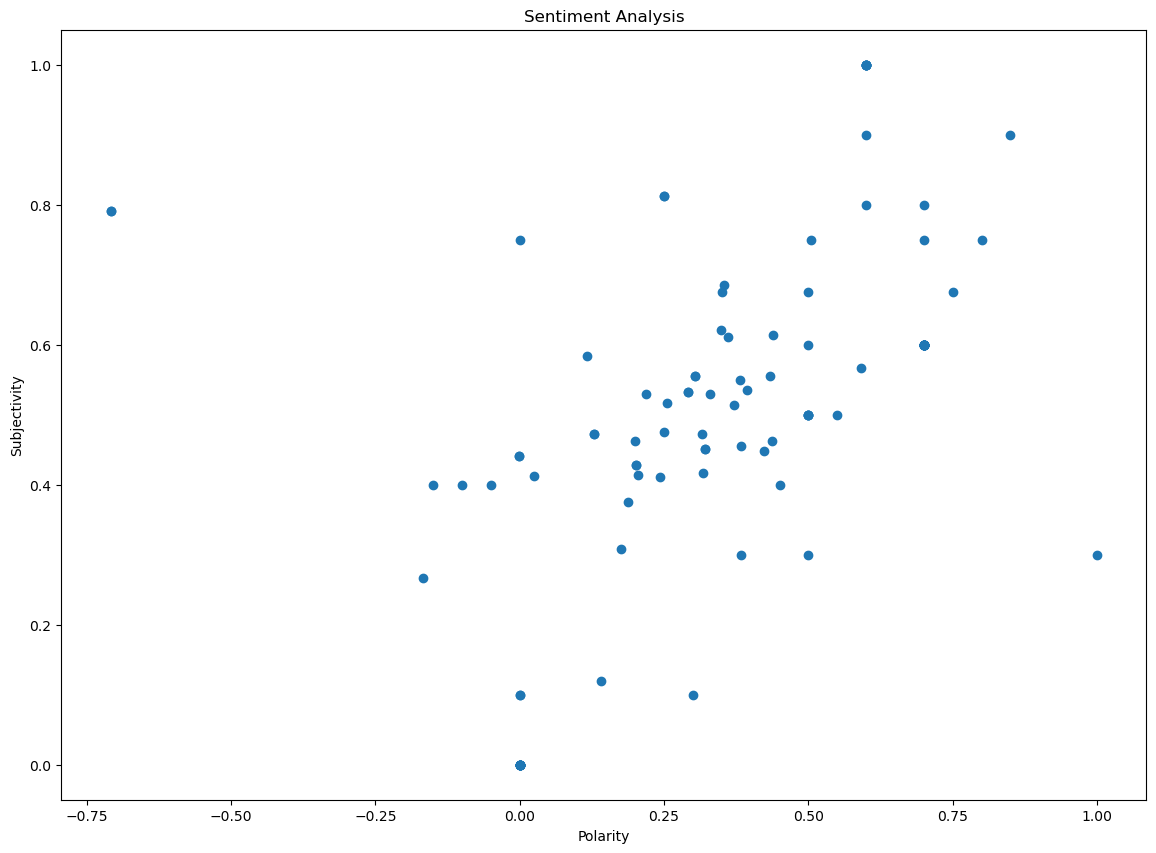

In [133]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [134]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171,pos
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274,pos
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266,neg
3,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin...",0.533112,0.292296,pos
4,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452,pos


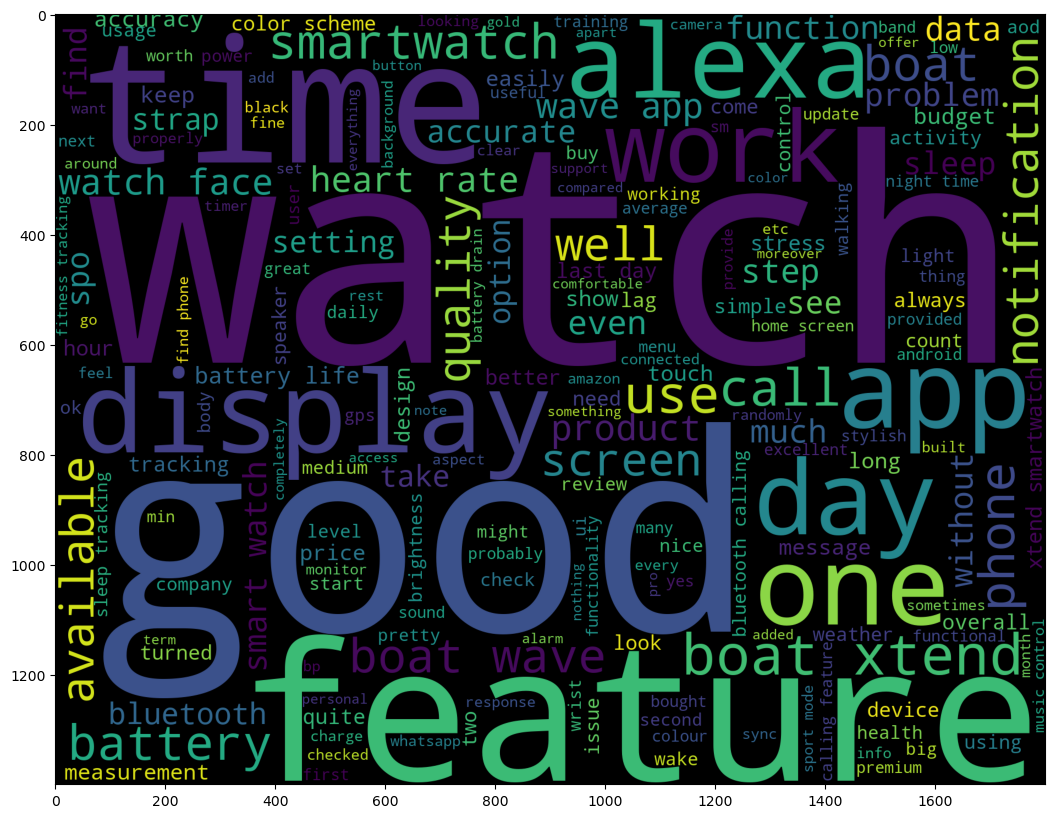

In [135]:
# Story Generation and Visualization
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud)

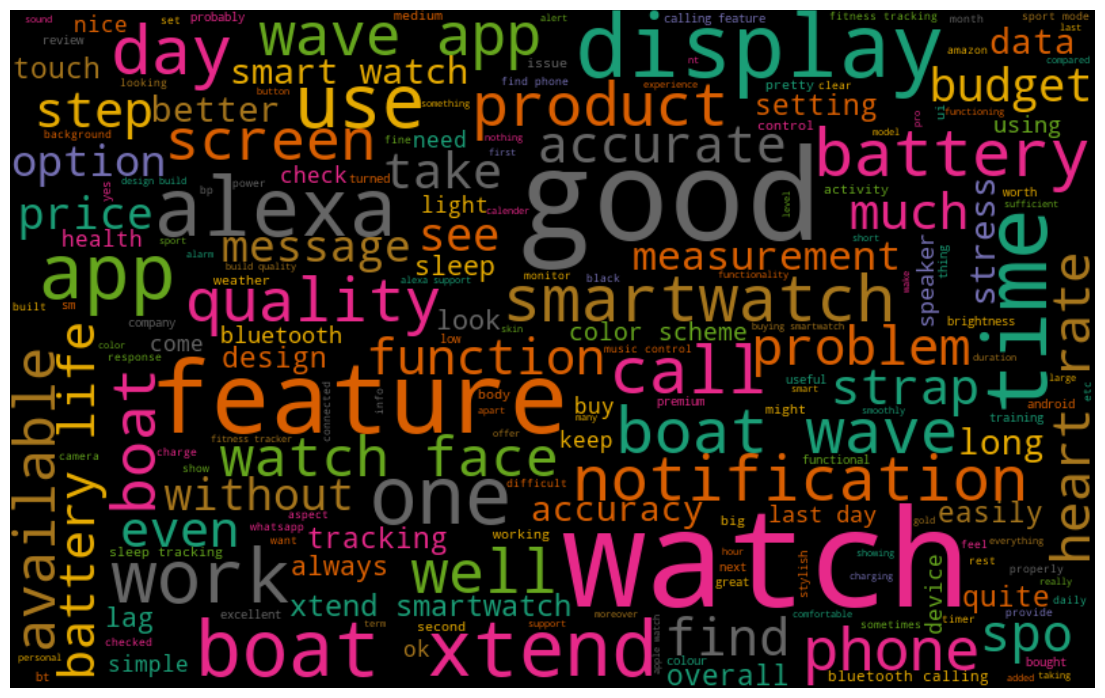

In [136]:
# Most common words in positive review
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

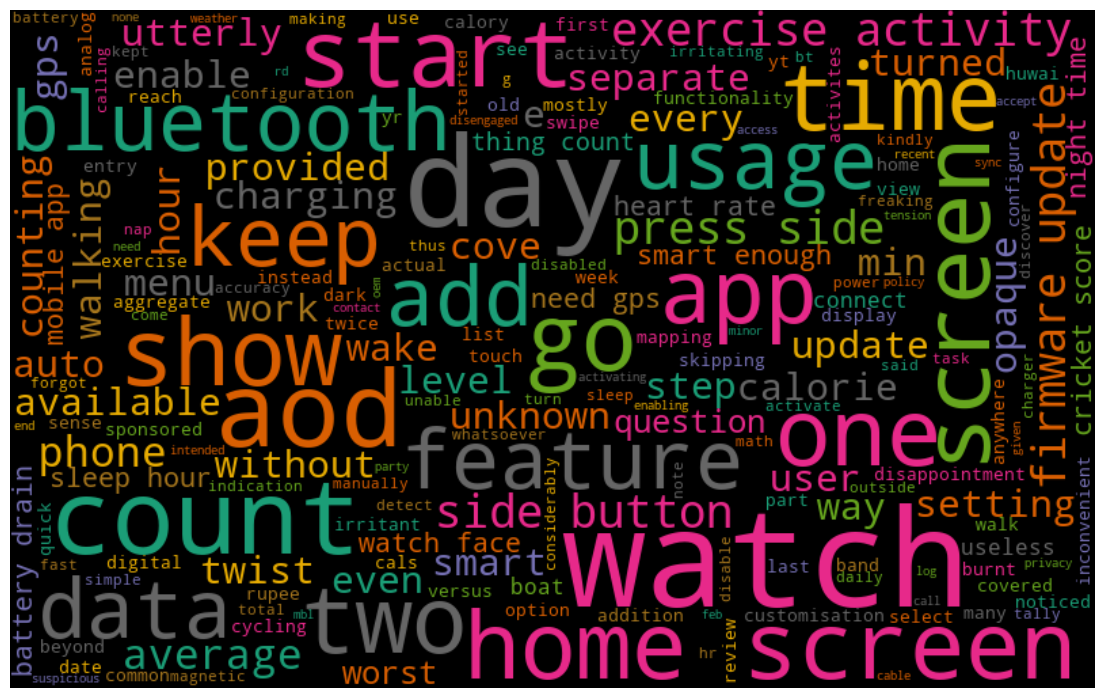

In [137]:
# Most common words in negative review
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)